# 1. Preprocess

## Run name

In [1]:
import time

project_name = 'DigitRecognizer'
step_name = 'Preprocess'
date_str = time.strftime("%Y%m%d", time.localtime())
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = '%s_%s_%s' % (project_name, step_name, time_str)
print('run_name: %s' % run_name)
t0 = time.time()

run_name: DigitRecognizer_Preprocess_20180417_211636


## Import PKGs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import display

import os
import gc
import math
import shutil
import zipfile
import pickle
import h5py
from PIL import Image

from tqdm import tqdm
from multiprocessing import cpu_count

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Basic folders

In [3]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
log_folder = os.path.join(cwd, 'log')
model_folder = os.path.join(cwd, 'model')
output_folder = os.path.join(cwd, 'output')
print('input_folder: \t\t%s' % input_folder)
print('log_folder: \t\t%s' % log_folder)
print('model_folder: \t\t%s' % model_folder)
print('output_folder: \t\t%s'% output_folder)

train_csv_file = os.path.join(input_folder, 'train.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t%s' % train_csv_file)
print('test_csv_file: \t\t%s' % test_csv_file)

processed_data_file = os.path.join(input_folder, '%s_%s.p' % (project_name, step_name))
print('processed_data_file: \t%s' % processed_data_file)

input_folder: 		D:\Kaggle\digit-recognizer\input
log_folder: 		D:\Kaggle\digit-recognizer\log
model_folder: 		D:\Kaggle\digit-recognizer\model
output_folder: 		D:\Kaggle\digit-recognizer\output

train_csv_file: 	D:\Kaggle\digit-recognizer\input\train.csv
test_csv_file: 		D:\Kaggle\digit-recognizer\input\test.csv
processed_data_file: 	D:\Kaggle\digit-recognizer\input\DigitRecognizer_Preprocess.p


## Basic functions

In [4]:
import sys
def describe(arr):
    print(arr.shape, arr.min(), arr.max(), sys.getsizeof(arr))

In [5]:
def show_data_images(rows, fig_column, y_data, *args):
    columns = len(args)
    figs, axes = plt.subplots(rows, columns, figsize=(rows, fig_column*columns))
    print(axes.shape)  
    for i, ax in enumerate(axes):
        y_data_str = ''
        if type(y_data) != type(None):
            y_data_str =  '_' + str(y_data[i])
        ax[0].set_title('28x28' + y_data_str)
        for j, arg in enumerate(args):
            ax[j].imshow(arg[i])

## Preview data

In [6]:
%%time
raw_data = np.loadtxt(train_csv_file, skiprows=1, dtype='int', delimiter=',')
x_data = raw_data[:,1:]
y_data = raw_data[:,0]

x_test = np.loadtxt(test_csv_file, skiprows=1, dtype='int', delimiter=',')

describe(x_data)
describe(y_data)
describe(x_test)

(42000, 784) 0 255 112
(42000,) 0 9 96
(28000, 784) 0 255 112
Wall time: 54.9 s


In [7]:
x_data = x_data/255.
x_test = x_test/255.

describe(x_data)
describe(x_test)

x_data = x_data.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)

describe(x_data)
describe(x_test)

# print(x_data[0])
print(y_data[0])

(42000, 784) 0.0 1.0 263424112
(28000, 784) 0.0 1.0 175616112
(42000, 28, 28) 0.0 1.0 128
(28000, 28, 28) 0.0 1.0 128
1


Text(0.5,1,'28x28 data')

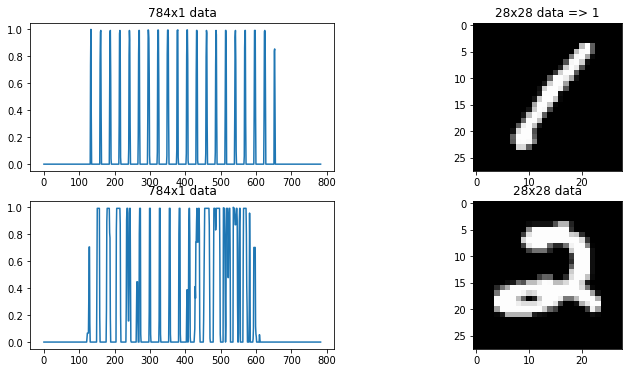

In [8]:
index = 0
fig, ax = plt.subplots(2, 2, figsize=(12,6))
ax[0, 0].plot(x_data[index].reshape(784,))
ax[0, 0].set_title('784x1 data')
ax[0, 1].imshow(x_data[index].reshape(28,28), cmap='gray')
ax[0, 1].set_title('28x28 data => ' + str(y_data[index]))

ax[1, 0].plot(x_test[index].reshape(784,))
ax[1, 0].set_title('784x1 data')
ax[1, 1].imshow(x_test[index].reshape(28,28), cmap='gray')
ax[1, 1].set_title('28x28 data')

## Save data

In [9]:
def save_data(x_data, y_data, x_test, file_name):
    if os.path.exists(file_name):
        os.remove(file_name)
        print('File removed: \t%s' % file_name)
    with h5py.File(file_name) as h:
        h.create_dataset('x_data', data=x_data)
        h.create_dataset('y_data', data=y_data)
        h.create_dataset('x_test', data=x_test)
    print('File saved: \t%s' % file_name)

def load_data(file_name):
    with h5py.File(file_name, 'r') as h:
        x_data = np.array(h['x_data'])
        y_data = np.array(h['y_data'])
        x_test = np.array(h['x_test'])
    print('File loaded: \t%s' % file_name)
    return x_data, y_data, x_test


processed_data_file = os.path.join(input_folder, '%s_%s.p' % (project_name, step_name))
save_data(x_data, y_data, x_test, processed_data_file)
x_data, y_data, x_test = load_data(processed_data_file)

print(x_data.shape)
print(y_data.shape)
print(x_test.shape)

File removed: 	D:\Kaggle\digit-recognizer\input\DigitRecognizer_Preprocess.p
File saved: 	D:\Kaggle\digit-recognizer\input\DigitRecognizer_Preprocess.p
File loaded: 	D:\Kaggle\digit-recognizer\input\DigitRecognizer_Preprocess.p
(42000, 28, 28)
(42000,)
(28000, 28, 28)


In [10]:
t1 = time.time()
print('Time spend: %.1f s' % (t1 - t0))
print('Done!')

Time spend: 60.9 s
Done!
